In [ ]:
!pip install tf-keras
import os
os.environ["TF_USE_LEGACY_KERAS"]="1"
!pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


# Importing the dataset

In [ ]:
import pandas as pd # Imported to enable the use of datastructures like dataframe
import matplotlib.pyplot as plt # Imported to visusalise data
import seaborn as sns # Imported to visualise data
from sklearn.metrics import confusion_matrix, classification_report # for report generation
from transformers import BertTokenizer
from transformers import TFBertForSequenceClassification
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from
# from
# from


In [ ]:
print(tf.__version__)  # Check TensorFlow version
# print(tf.keras._)

2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importing the datasets
train_path='/content/drive/MyDrive/Datasets/Original_Train_Data.xlsx'
val_path='/content/drive/MyDrive/Datasets/Original_Val_Data.xlsx'
test_path='/content/drive/MyDrive/Datasets/Original_Test_Data.xlsx'
new_test_path='/content/drive/MyDrive/Datasets/Re-AnnotatedDataset.xlsx'


In [ ]:
df_train = pd.read_excel(train_path, sheet_name='Sheet1')
df_val = pd.read_excel(val_path, sheet_name='Sheet1')
df_test = pd.read_excel(test_path, sheet_name='Sheet1')
df_new_test = pd.read_excel(new_test_path, sheet_name='Sheet1')

In [ ]:
print(df_train.shape)
print(df_test)

(4851, 2)
               id                                               text  \
0        ml_sen_1            Bollywood film Newton inte remake aano?   
1        ml_sen_2  endukond viewrs koodunnilla ?? ippozhum 2.8m a...   
2        ml_sen_3  Mara paazhu mega mairananil ninnum ethil koodu...   
3        ml_sen_4                       Video nay cang xem cang thit   
4        ml_sen_5  Sunny chechiye kaanan vannathu njan maathram aano   
...           ...                                                ...   
1343  ml_sen_1344                          143k views and 145k likes   
1344  ml_sen_1345               Nasik doll tiltle bgm aane highlight   
1345  ml_sen_1346  Mohanlalile ishtapetta vekthiyayirunnu njan pa...   
1346  ml_sen_1347            ivaruku ivlo age nu sonna evan nambuvan   
1347  ml_sen_1348  Kanditt Amala Paul Aadai tamil mattoru version...   

           category  
0           Neutral  
1           Neutral  
2          Negative  
3     Not-Malayalam  
4           Neu

In [ ]:
df_train['label_num'] = df_train.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df_val['label_num'] = df_val.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df_test['label_num'] = df_test.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df_new_test['label_num'] = df_new_test.Agreement.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})


In [ ]:
# copy train('text') to x_train
# copy train('category') to y_train

X_train = df_train['text']
y_train = df_train['label_num']

X_val = df_val['text']
y_val = df_val['label_num']

X_test = df_test['text']
y_test = df_test['label_num']

X_new_test = df_new_test['text']
y_new_test = df_new_test['label_num']

# copy test('text') to x_test





# Training the model

In [ ]:
model_name = "bert-base-multilingual-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=5)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
max_len= 128
# Tokenize and encode the sentences
X_train_encoded = tokenizer.batch_encode_plus(X_train.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(X_val.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(X_test.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_new_test_encoded = tokenizer.batch_encode_plus(X_new_test.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')


In [ ]:
k = 0
print('Training Comments -->>',X_train[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',y_train[k])


Training Comments -->>  hoo mammokka police vesham aaha anthas

Input Ids -->>
 tf.Tensor(
[  101 10616 10132 19324 73427 10358 13202 52133 12947 17612 10911 14337
 19926   102     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0], shape=(84,), dtype=int32)

Decoded Ids -->>
 [CLS] hoo mammokka police vesham aaha anthas [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [ ]:
# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = Adam(learning_rate=2e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [ ]:
# Step 5: Train the model
history = model.fit(
	[X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
	y_train,
	validation_data=(
	[X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
	batch_size=32,
	epochs=6
)


Epoch 1/6


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
152/152 [==============================] - 187s 633ms/step - loss: 1.2122 - accuracy: 0.5203 - val_loss: 1.0139 - val_accuracy: 0.6296
Epoch 2/6
152/152 [==============================] - 87s 573ms/step - loss: 0.9001 - accuracy: 0.6654 - val_loss: 0.8694 - val_accuracy: 0.6722
Epoch 3/6
152/152 [==============================] - 87s 573ms/step - loss: 0.7058 - accuracy: 0.7396 - val_loss: 0.8279 - val_accuracy: 0.7148
Epoch 4/6
152/152 [==============================] - 87s 574ms/step - loss: 0.5382 - accuracy: 0.8151 - val_loss: 0.9299 - val_accuracy: 0.6926
Epoch 5/6
152/152 [==============================] - 87s 572ms/step - loss: 0.3877 - accuracy: 0.8707 - val_loss: 1.0522 - val_accuracy: 0.6778
Epoch 6/6
152/152 [==============================] - 87s 572ms/step - loss: 0.2832 - accuracy: 0.9033 - val_loss: 1.0304 - val_accuracy: 0.7037


In [ ]:
#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
	[X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']],
	y_test
)
print("Original Research Results")
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')


43/43 [==============================] - 17s 169ms/step - loss: 1.0033 - accuracy: 0.7151
Original Research Results
Test loss: 1.0033401250839233, Test accuracy: 0.715133547782898


In [ ]:
#Evaluate the model on the test data
new_test_loss, new_test_accuracy = model.evaluate(
	[X_new_test_encoded['input_ids'], X_new_test_encoded['token_type_ids'], X_new_test_encoded['attention_mask']],
	y_new_test
)
print("Newly annotated Research Results")
print(f'Test loss: {new_test_loss}, Test accuracy: {new_test_accuracy}')


43/43 [==============================] - 7s 171ms/step - loss: 1.4527 - accuracy: 0.6120
Newly annotated Research Results
Test loss: 1.4527009725570679, Test accuracy: 0.612017810344696


In [ ]:
path = 'path-to-save'
# Save tokenizer
tokenizer.save_pretrained(path +'/Tokenizer')

# Save model
model.save_pretrained(path +'/Model')


# Original Results

In [ ]:
pred = model.predict(
	[X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

# Positive':0,
#     'Negative':1,
#     'Mixed_feelings':2,
#     'Neutral':3,
#     'Not-Malayalam':4


label = {
	0: 'Positive',
	1: 'Negative',
  2: 'Mixed_feelings',
  3: 'Neutral',
  4: 'Not-Malayalam'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label :', Actual[:10])


43/43 [==============================] - 21s 170ms/step
Predicted Label : ['Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Positive', 'Negative']
Actual Label : ['Neutral', 'Neutral', 'Negative', 'Not-Malayalam', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Not-Malayalam', 'Negative']


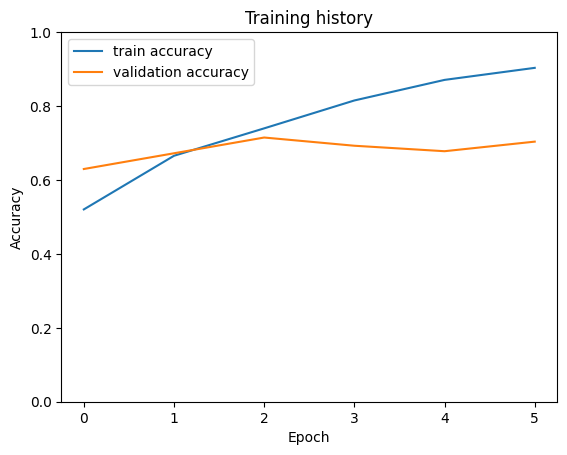

In [ ]:
# Access the history attribute to get the training history
acc = history.history['accuracy']  # Might be 'acc' in some versions of TensorFlow/Keras
val_acc = history.history['val_accuracy']  # Might be 'val_acc' in some versions

# Plot training and validation accuracy
plt.plot(acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

# Graph characteristics
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])
plt.show()

In [ ]:
print("Classification Report: \n", classification_report(Actual, pred_labels))


Classification Report: 
                 precision    recall  f1-score   support

Mixed_feelings       0.42      0.44      0.43        70
      Negative       0.68      0.51      0.59       138
       Neutral       0.66      0.71      0.68       398
 Not-Malayalam       0.81      0.75      0.78       177
      Positive       0.77      0.79      0.78       565

      accuracy                           0.72      1348
     macro avg       0.67      0.64      0.65      1348
  weighted avg       0.72      0.72      0.71      1348



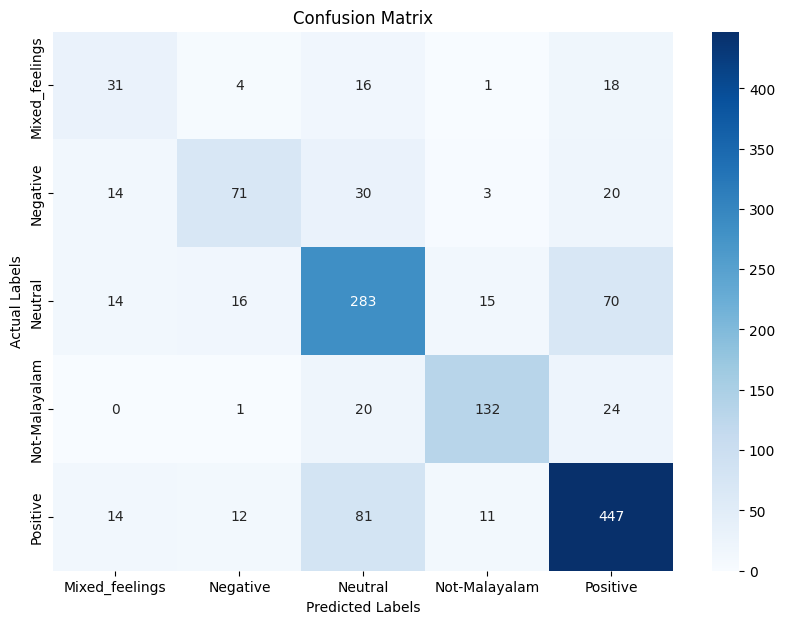

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(Actual, pred_labels)
class_names = np.unique(Actual)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Newly Annotated Results

In [ ]:


pred = model.predict(
	[X_new_test_encoded['input_ids'], X_new_test_encoded['token_type_ids'], X_new_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

# Positive':0,
#     'Negative':1,
#     'Mixed_feelings':2,
#     'Neutral':3,
#     'Not-Malayalam':4


label = {
	0: 'Positive',
	1: 'Negative',
  2: 'Mixed_feelings',
  3: 'Neutral',
  4: 'Not-Malayalam'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_new_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label :', Actual[:10])


43/43 [==============================] - 8s 181ms/step
Predicted Label : ['Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Positive', 'Negative']
Actual Label : ['Neutral', 'Mixed_feelings', 'Negative', 'Not-Malayalam', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Mixed_feelings']


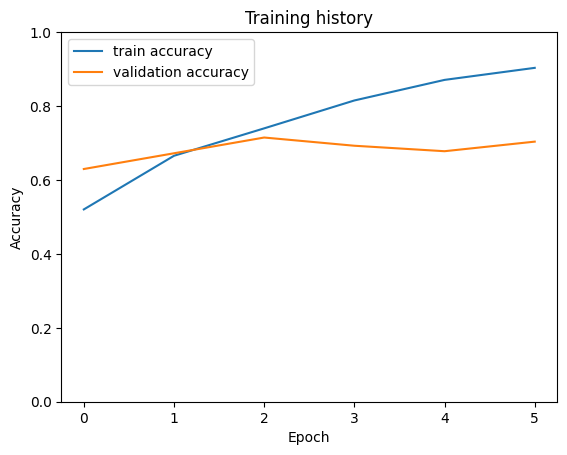

In [ ]:
# Access the history attribute to get the training history
acc = history.history['accuracy']  # Might be 'acc' in some versions of TensorFlow/Keras
val_acc = history.history['val_accuracy']  # Might be 'val_acc' in some versions

# Plot training and validation accuracy
plt.plot(acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

# Graph characteristics
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])
plt.show()

In [ ]:
print("Classification Report: \n", classification_report(Actual, pred_labels))


Classification Report: 
                 precision    recall  f1-score   support

Mixed_feelings       0.42      0.22      0.29       144
      Negative       0.69      0.44      0.54       162
       Neutral       0.50      0.66      0.57       327
 Not-Malayalam       0.36      0.65      0.46        89
      Positive       0.78      0.72      0.75       626

      accuracy                           0.61      1348
     macro avg       0.55      0.54      0.52      1348
  weighted avg       0.63      0.61      0.61      1348



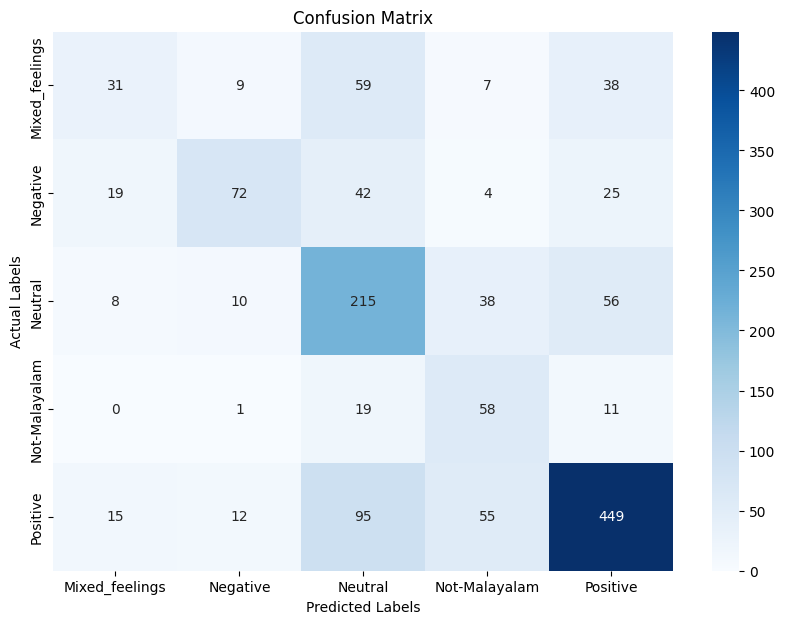

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(Actual, pred_labels)
class_names = np.unique(Actual)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()